<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# Amazon Reviews

### Notebook Sections

1. Setting Up

2. Cleaning

3. Functions

4. Testing and refining function/model

5. Final Function

# 1. Setting Up

In [1]:
import string
import pandas as pd
from nltk import RegexpTokenizer
import re
from word2number import w2n
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

Showing the code used to obtain the file reviews.csv

In [2]:
#import gzip

#def parse(path):
#    g = gzip.open(path, 'rb')
#    for l in g:
#        yield eval(l)
#
#def getDF(path):
#    i = 0
#    df = {}
#    for d in parse(path):
#        df[i] = d
#        i += 1
#    return pd.DataFrame.from_dict(df, orient='index')
#
### Did this to each file
#
#df = getDF('qa_Video_Games.json.gz')

In [3]:
## Saving each file as a csv

#df.to_csv('videogames.csv')

In [4]:
## Creating list of all the datasets

#data = ['appliances.csv', 'arts.csv', 'auto.csv', 'baby.csv', 'beauty.csv', 'clothing.csv', 'electronics.csv', 'grocery.csv', 'health.csv', 'home.csv', 'industrial.csv', 'music.csv', 'office.csv', 'patio.csv', 'pet.csv', 'phones.csv', 'software.csv', 'sports.csv', 'tools.csv', 'toys.csv', 'videogames.csv']

In [5]:
## Creating an empty list and empty dataframe
## Then loop through the names of the individual datasets and add them to the empty list
## Then concat them all together into one dataframe

#list_of_df = []
#df = pd.DataFrame()

#for file in data:
#    df = pd.read_csv(file)
#    list_of_df.append(df)

#df = pd.concat(list_of_df,ignore_index=True)

In [6]:
## Saving the complete data

#df.to_csv('reviews.csv')

reviews.csv is the file uploaded with this project - so the code starts here 

In [7]:
## Reading in the complete data

df = pd.read_csv('reviews.csv', index_col=False)

In [8]:
df.shape

(1396896, 9)

In [9]:
## First look at the data

df.head(10)

,Unnamed: 0.1,Unnamed: 0,questionType,asin,answerTime,unixTime,question,answerType,answer
0,0,0,yes/no,B00004U9JP,"Jun 27, 2014",1.403852e+09,I have a 9 year old Badger 1 that needs replac...,?,I replaced my old one with this without a hitch.
1,1,1,open-ended,B00004U9JP,"Apr 28, 2014",1.398668e+09,model number,NaN,This may help InSinkErator Model BADGER-1: Bad...
2,2,2,yes/no,B00004U9JP,"Aug 25, 2014",1.408950e+09,can I replace Badger 1 1/3 with a Badger 5 1/2...,?,Plumbing connections will vary with different ...
3,3,3,yes/no,B00004U9JP,"Nov 3, 2014",1.415002e+09,Does this come with power cord and dishwasher ...,?,It does not come with a power cord. It does co...
4,4,4,open-ended,B00004U9JP,"Jun 21, 2014",1.403334e+09,loud noise inside when turned on. sounds like ...,NaN,Check if you dropped something inside.Usually ...
5,5,5,open-ended,B00004U9JP,"Jul 13, 2013",1.373699e+09,where is the reset button located,NaN,on the bottom
6,6,6,open-ended,B00004U9JO,"Mar 9, 2014",1.394352e+09,I have a badger 5 it is leaking water at botto...,NaN,If your garbage disposal is leaking out the bo...
7,7,7,open-ended,B00004U9JO,"Sep 24, 2014",1.411542e+09,"If no power cord is included, how do I plug in...",NaN,I ttok mine off of the broken unit and install...
8,8,8,open-ended,B00004U9JO,"Nov 10, 2013",1.384070e+09,Can someone tell me if this Badger 5 disposer ...,NaN,"I replaced my a couple of months ago, I'm semi..."
9,9,9,open-ended,B00004U9JO,"Jul 24, 2013",1.374649e+09,Is this Badger 5 compatible with the Badger 5 ...,NaN,It fit the same as the one we replaced


In [10]:
## Columns with nulls are: unixTime, answerType, a few from answer, and one from question

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396896 entries, 0 to 1396895
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0.1  1396896 non-null  int64  
 1   Unnamed: 0    1396896 non-null  int64  
 2   questionType  1396896 non-null  object 
 3   asin          1396896 non-null  object 
 4   answerTime    1396896 non-null  object 
 5   unixTime      1346991 non-null  float64
 6   question      1396895 non-null  object 
 7   answerType    663866 non-null   object 
 8   answer        1396798 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 95.9+ MB


Rundown of the columns:

Unnamed: 0 - is an old index that can be dropped
asin - ID of the product, e.g. B000050B6Z
questionType - type of question. Could be 'yes/no' or 'open-ended'
answerType - type of answer. Could be 'Y', 'N', or '?' (if the polarity of the answer could not be predicted). Only present for yes/no questions.
answerTime - raw answer timestamp
unixTime - answer timestamp converted to unix time
question - question text
answer - answer text

In [11]:
## Explore the data - having a look at some answers and what makes some of them helpful and unhelpful

import random
nums = [random.randint(0,len(df)) for _ in  range(5)]

for i in range(5):
    print("\n", df.iloc[nums[i], 7], "\n\n", "~~~~~~~~~~~~~")


 nan 

 ~~~~~~~~~~~~~

 Y 

 ~~~~~~~~~~~~~

 Y 

 ~~~~~~~~~~~~~

 ? 

 ~~~~~~~~~~~~~

 nan 

 ~~~~~~~~~~~~~


In [12]:
# Examine the question type column
df['questionType'].unique()

array(['yes/no', 'open-ended'], dtype=object)

In [13]:
df['questionType'].value_counts()

open-ended    733030
yes/no        663866
Name: questionType, dtype: int64

In [14]:
# 4 answer types - 2 are non useful
df['answerType'].unique()

array(['?', nan, 'Y', 'N'], dtype=object)

In [15]:
df['answerType'].value_counts()

?    328239
Y    236459
N     99168
Name: answerType, dtype: int64

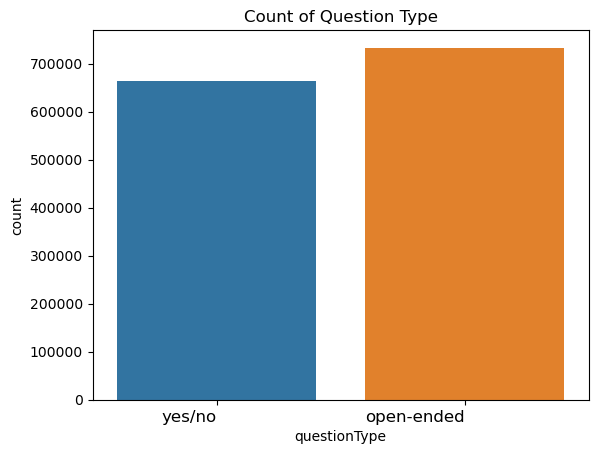

In [16]:
ax = sns.countplot(x= df['questionType'])
plt.title('Count of Question Type')

plt.xticks(
    horizontalalignment='right',
    fontweight ='light',
    fontsize ='large', wrap = True
)
plt.show()


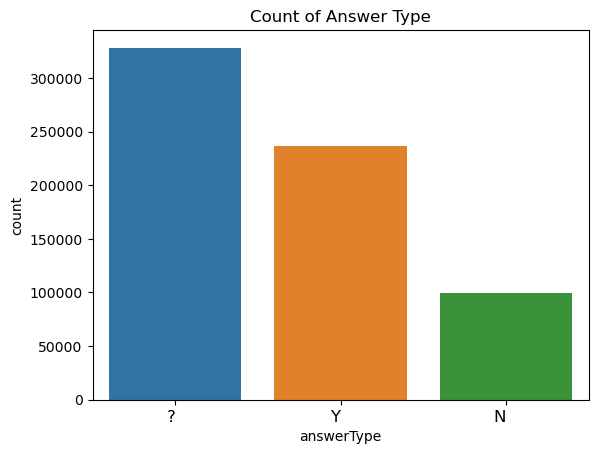

In [17]:
plt.show()

ax = sns.countplot(x=df['answerType'])
plt.title('Count of Answer Type')

plt.xticks(
    horizontalalignment='right',
    fontweight='light',
    fontsize='large', wrap=True
)
plt.show()


# 2. Cleaning

In [18]:
## Taking a sample

sample = df.sample(n=10000, random_state=12)

In [19]:
## Dropping unneeded columns

sample.drop(columns= ['Unnamed: 0', 'asin', 'answerTime', 'unixTime'], inplace=True)

In [20]:
## Creating a list of stopwords and adding punctuation to it

stop = stopwords.words('english')
stop.extend(string.punctuation)

## Removing words we still want in the data
keep = ['no', '!', '?', "don't", 'not']
for x in keep:
    stop.remove(x)

## Adding words we do not want in the data
stop.extend(["n't", "'m", "--", "'s"])

In [21]:
## Function to clean the data

def prep(data):
    """Lowering Everything"""
    data = data.lower()

    """Tokenize"""
    tokenizer = RegexpTokenizer(r"[\w']+")
    data = tokenizer.tokenize(data)

    """Turning Number Words into Actual Numbers"""
    data_clean = []
    for word in data:
        try:
            word = str(w2n.word_to_num(word))
        except:
            word = word
        data_clean.append(word)

    """Removing Punctuation and Stopwords"""
    data_clean = [word for word in data_clean if word not in stop]

    """Stemming the Words"""
    s_stemmer = SnowballStemmer(language='english')
    data_clean = [s_stemmer.stem(word) for word in data_clean]

    """Removing Punctuation and Stopwords Again"""
    data_clean = [word for word in data_clean if word not in stop]

    return data_clean

In [22]:
## Cleaning the question column

sample['q_clean'] = sample['question'].apply(prep)

In [23]:
## Cleaning the answer column

sample['a_clean'] = sample['answer'].apply(prep)

In [24]:
sample.head(30)

,Unnamed: 0.1,questionType,question,answerType,answer,q_clean,a_clean
587406,587406,open-ended,hi can someone tell me the expiration date for...,NaN,the exp. date would depend on WHEN you buy it ...,"[hi, someon, tell, expir, date, product, say, ...","[exp, date, would, depend, buy, amazon, look, ..."
1043869,1043869,yes/no,Will this phone work on some network in India ?,?,It didn't work there and i have to brink it ba...,"[phone, work, network, india]","[work, brink, back, return, make, sure, phone,..."
414521,414521,yes/no,can logitech mus work iwth thinkpad,?,Sure. Any Logitech mouse works with thinkpad.,"[logitech, mus, work, iwth, thinkpad]","[sure, logitech, mous, work, thinkpad]"
1336492,1336492,yes/no,Will these cars fit the hot wheels super loop ...,?,I think they fit.,"[car, fit, hot, wheel, super, loop, chase, rac...","[think, fit]"
1160409,1160409,yes/no,Can you explain to me a little better about ho...,Y,The bottom is like a foam covered in clothe an...,"[explain, littl, better, knive, don't, fall, r...","[bottom, like, foam, cover, cloth, knive, sink..."
124581,124581,open-ended,Graco Safeseat- do the straps adjust like the ...,NaN,"The safe seat does not adjust in the back, it ...","[graco, safeseat, strap, adjust, like, cheap, ...","[safe, seat, not, adjust, back, adjust, like, ..."
1012642,1012642,yes/no,Does it have a key pocket?,?,It does not. It only has a larger elastic band...,"[key, pocket]","[not, larger, elast, band, area, stuff, earbud..."
4082,4082,yes/no,Will it fit FGHG2366PF which calls for ULTRAWF?,N,"No, it will not. ULTRAWF can be used in place ...","[fit, fghg2366pf, call, ultrawf]","[no, not, ultrawf, use, place, wf3cb, upgrad, ..."
792456,792456,open-ended,what size are the shams,NaN,Standard,"[size, sham]",[standard]
1091483,1091483,open-ended,i need to know if this will fit my MODEL- 5726...,NaN,Yes,"[need, know, fit, model, 5726750, vendor, cole...",[yes]


# 3. Functions

In [25]:
def number(answer):
    """This will search for the first occurrence of a digit and if found will make the score 1"""
    score = 0
    for word in answer:
        x = re.search(r'\d', word)
        if x is not None:
            score = 1
    return score

In [26]:
def yes_no(answer):
    """This will search for the first occurrence of yes or no and if found will make the score 1"""
    score = 0
    for word in answer:
        x = re.search(r'ye(s|p|ah)|no(pe)?', word)
        if x is not None:
            score = 1
    return score

In [27]:
def cosinesim(a,b):
    """This creates a score based on the similarity between the question and answer"""
    if len(a) == 0 or len(b) == 0:
        return 0
    else:
        a_vals = Counter(a)
        b_vals = Counter(b)

        words  = list(a_vals.keys() | b_vals.keys())
        a_vect = [a_vals.get(word, 0) for word in words]
        b_vect = [b_vals.get(word, 0) for word in words]

        len_a  = sum(av*av for av in a_vect) ** 0.5
        len_b  = sum(bv*bv for bv in b_vect) ** 0.5

        dot    = sum(av*bv for av,bv in zip(a_vect, b_vect))
        cosine = dot / (len_a * len_b)
        return cosine

In [28]:
## Creating a list of useful words and of not useful words
useful_words = 'love,hate,helps,perfect,awesome,great,definitely,!'.split(',')
not_useful_words = 'sorry,probably,awful,unfortunately,maybe,?,guess,never,think,unsure'.split(',')

## Stemming these words as they will be used to match words in the cleaned verson of the data
s_stemmer = SnowballStemmer(language='english')
useful_words = [s_stemmer.stem(word) for word in useful_words]
not_useful_words = [s_stemmer.stem(word) for word in not_useful_words]

def score_answer(clean_answer):
    """This will calculate a useful/not useful score based on whether a word from the useful list or not useful list appears in the answer"""

    positive_count = sum([1 for i in clean_answer if i in useful_words])
    negative_count = sum([1 for i in clean_answer if i in not_useful_words])
    try:
        useful_score = round((positive_count) / len(clean_answer), 2)
        not_useful_score = round((negative_count) / len(clean_answer), 2)
    except ZeroDivisionError:
        useful_score = 0
        not_useful_score = 0

    return useful_score, not_useful_score

In [29]:
def keyword_check(proc_question, proc_answer):
    """Returns 1 if there is a key word in the question and if the answer contains any words associated with that key word"""

    key_words = {
        'size': ['small', 'med', 'medium', 'larg'],
        'weight': ['g', 'kg', 'lb', 'gram', 'kilo', 'kilogram',],
        'distanc': ['metr', 'centimetr','millimetr', 'cm', 'inch'],
        'diamet': ['metr', 'centimetr','millimetr', 'cm', 'inch'],
        'dimens': ['metr', 'centimetr','millimetr', 'cm', 'inch'],
        'color': ['blue', 'red', 'green', 'black', 'white', 'silver', 'gray','orang','pink','purpl'],
        'batteri': ['volt', 'aa', 'aaa','lithium', '9v', '3v' ],
        'warranti': ['year', 'month']
    }

    key_match = 0

    for key in list(key_words.keys()):
        if key in proc_question:
            for word in key_words[key]:
                if word in proc_answer:
                    key_match = 1

    return key_match

In [30]:
def keyword_number_check(question, answer):
    """ Returns 1 if question contains a number indicating keyword and the answer contains a number, else returns 0"""

    num_keywords = ['size','weight','distanc','diamet','dimens', 'high', 'tall', 'amount', 'wide', 'big', 'small', 'much', 'price', 'minimum', 'maximum','long','warranty', 'model']

    score = 0
    for key in num_keywords:
        if key in question:
            for item in answer:
                x = re.search(r'\d', item)
                if x is not None:
                    score = 1

    return score

In [31]:
def pair_check(clean_answer):
    clean_answer = list(ngrams(clean_answer, 2))
    pairs = [("don't","know"), ("no","idea"), ("can't", "say"),("no","expert"), ("not","sure"), ("don't","really"),("can't","help"),("sorri","can't")]
    same_word = []
    for word in clean_answer:
        if word in pairs:
            same_word.append(word)
    if len(same_word) > 0:
        score = 1
        return score
    else:
        return 0

# 4. Testing and refining function/model

In [32]:
test = sample.sample(n=50, random_state=12)

In [33]:
def test_function(question, answer):

    prep_question = prep(question)
    prep_answer = prep(answer)
    print(keyword_check(prep_question,prep_answer)) ## Binary
    print(keyword_number_check(prep_question,prep_answer)) ## Binary
    print(cosinesim(prep_question,prep_answer)) ## Continuous
    print(yes_no(prep_answer)) ## Binary
    print(number(prep_answer)) ## Binary
    print(score_answer(prep_answer)) ## Continuous
    print(pair_check(prep_answer)) ## Binary

    sim = cosinesim(prep_question, prep_answer)
    if sim > 0.5:
        sim = 0.5

    helpful_score = (yes_no(prep_answer) * 4) + (keyword_check(prep_question,prep_answer) * 5) + (sim * 8) + (score_answer(prep_answer)[0] * 2) + (score_answer(prep_answer)[1] * -4) + (number(prep_answer) * 2) + (keyword_number_check(prep_question,prep_answer) * 4) + (pair_check(prep_answer) * -8)

    helpful_score = (helpful_score + 12) / 33 # normalise score
    return helpful_score

Function outputs to weight:

keyword_check
keyword_number_check
cosinesim
yes_no
number
score_answer +ve
score_answer -ve
pair_check

In [34]:
test['useful_score'] = test.apply(lambda x: test_function(x['question'],x['answer']), axis=1)


0
0
0.43852900965351466
0
1
(0.0, 0.0)
0
0
0
0.050507627227610534
1
1
(0.04, 0.0)
1
0
0
0.5773502691896258
1
0
(0.0, 0.0)
0
0
0
0.43301270189221935
1
0
(0.0, 0.0)
0
0
0
0.14285714285714285
0
1
(0.0, 0.0)
0
0
1
0.29095718698132317
0
1
(0.0, 0.0)
0
0
1
0.0
0
1
(0.02, 0.0)
0
0
0
0.31980107453341566
1
0
(0.0, 0.0)
1
0
0
0.3666177875533832
0
1
(0.04, 0.0)
0
0
0
0.140028008402801
0
0
(0.0, 0.0)
0
0
0
0.20100756305184242
1
1
(0.0, 0.0)
0
0
0
0.3279566366999691
0
1
(0.02, 0.0)
0
0
0
0.13608276348795434
1
1
(0.0, 0.0)
0
0
0
0.3511234415883917
1
1
(0.0, 0.0)
0
0
0
0.7071067811865476
1
1
(0.0, 0.0)
0
0
0
0.10540925533894598
1
0
(0.0, 0.0)
0
0
0
0.35575623676894264
0
0
(0.0, 0.02)
0
0
0
0.5773502691896258
0
0
(0.0, 0.0)
0
0
0
0.21320071635561041
1
0
(0.0, 0.0)
0
0
0
0.0
1
1
(0.0, 0.0)
0
0
0
0.26144349280800105
1
1
(0.0, 0.02)
0
0
0
0.37208055032045606
1
1
(0.03, 0.03)
0
0
0
0.280056016805602
0
0
(0.0, 0.07)
0
0
0
0.0
1
0
(0.0, 0.0)
0
0
0
0.2993421700446249
1
1
(0.0, 0.0)
0
0
0
0.11744404390294069


Text(0.5, 0, 'Useful Score')

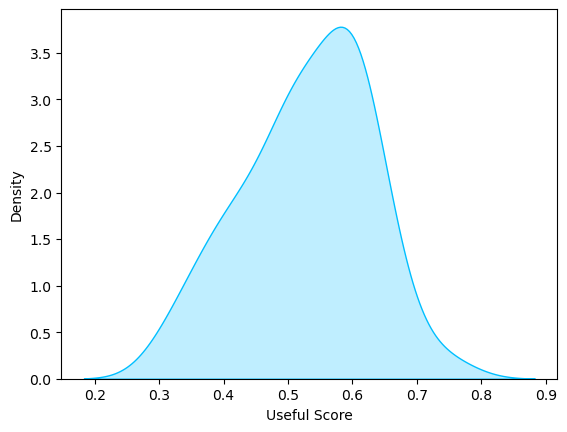

In [35]:
ax = sns.kdeplot(test['useful_score'],
                 color="deepskyblue", shade = True)
ax.set_ylabel('Density')
ax.set_xlabel('Useful Score')


# 5.  Final Function

In [36]:
def function(question, answer):

    prep_question = prep(question)
    prep_answer = prep(answer)

    sim = cosinesim(prep_question, prep_answer)
    if sim > 0.5:
        sim = 0.5

    helpful_score = (yes_no(prep_answer) * 4) + (keyword_check(prep_question,prep_answer) * 5) + (sim * 8) + (score_answer(prep_answer)[0] * 2) + (score_answer(prep_answer)[1] * -4) + (number(prep_answer) * 2) + (keyword_number_check(prep_question,prep_answer) * 4) + (pair_check(prep_answer) * -8)

    helpful_score = (helpful_score + 12) / 33 # normalise score

    return helpful_score

In [39]:
def user_input_function():
    user_question = input("Please ask a question: ")
    user_answer = input("Please provide an answer: ")

    score = function(user_question, user_answer)

    print(f'\n\nQuestion:  {user_question}')
    print(f'Answer:  {user_answer}')

    print(f'Your answer usefulness score is {round(score,2)}')
    
    # o.4 chosen as cut off point based on inspection 
    if score > 0.4:
        print('Your answer is useful')
        return True
    else:
        print('Your answer is not useful')
        return False

In [40]:
user_input_function()

Please ask a question: question?
Please provide an answer: answer


Question:  question?
Answer:  answer
Your answer usefulness score is 0.36
Your answer is not useful


False